In [1]:
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from joblib import load,dump
import scipy.linalg as la
from scipy.optimize import nnls

import sys
sys.path.insert(0,'../scripts/')
from processDynamic import ProcessDynamic

In [2]:
# # I saved my own model data as pickle files, but may not need
# model_output = load('../data/p14model-ocv.pkl')
#model_data = load('../data/p14model-data.pkl')

In [3]:
# Note, had to resave this data in Octave like so: save -mat7-binary 'file.mat' model
#data = scipy.io.loadmat('../data/P14model-ocv-mat7.mat', simplify_cells=True)

In [4]:
test = ProcessDynamic(model_dir='../data/',do_hyst=1,num_poles=2)

In [5]:
test.load_data()

In [6]:
test.compute_test_params()

25 14.531852290290429 0.9910212941308391
5 14.482598404517704 0.9874053548391215
45 14.414656461803379 0.9902808733940264


In [7]:
test.compute_ocv_soc()

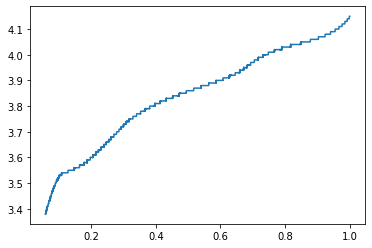

In [8]:
plt.plot(test.model[5]['Z'],test.model[5]['OCV'][0])

In [9]:
test.minfn(5,1,96.11)

Trying np =  3
Trying np =  4
Trying np =  5
rcfact before [0.07132146+0.j 0.60820638+0.j 0.97998973+0.j]
rcfact after [0.60820638+0.j 0.97998973+0.j]


../scripts/processDynamic.py:251: ComplexWarning: Casting complex values to real discards the imaginary part
  vrcRaw[:,i:i+2] = np.diag(RCfact)*vrcRaw[:,i-1] + (1-RCfact)*current[i-1]


W [0.03529264 0.00256421 0.00459989 0.0007517  0.        ]
Rfact [0.0007517 0.       ]
vest1 (35560,)
vrcRaw (35560, 2)
Rfact (2,)
R0 ()


ValueError: operands could not be broadcast together with shapes (35560,) (35560,2) 

In [10]:
H_py = test.model[5]['H']

In [11]:
H_o = scipy.io.loadmat('../data/H.mat', simplify_cells=True)['H']

In [12]:
H_o = H_o.T

In [13]:
H_o.shape

(5, 35560)

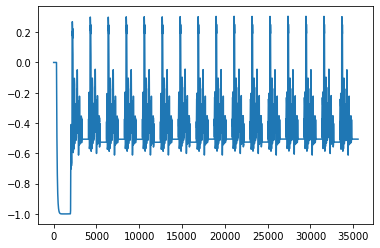

In [14]:
plt.plot(H_py[0])

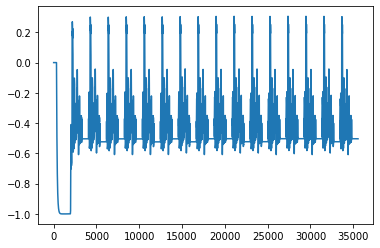

In [15]:
plt.plot(H_o[0])

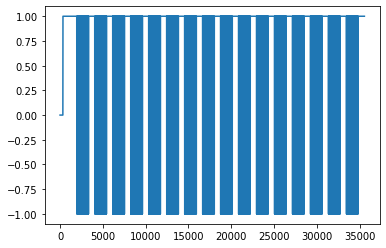

In [16]:
plt.plot(H_py[1])

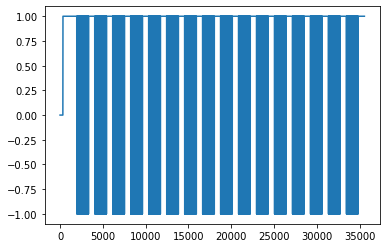

In [17]:
plt.plot(H_o[1])

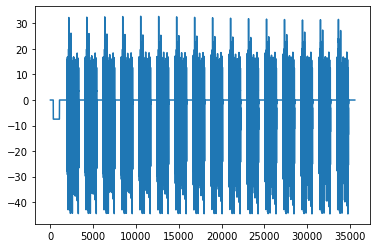

In [18]:
plt.plot(H_py[2])

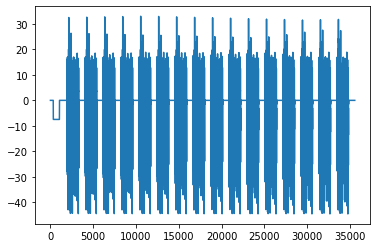

In [19]:
plt.plot(H_o[2])

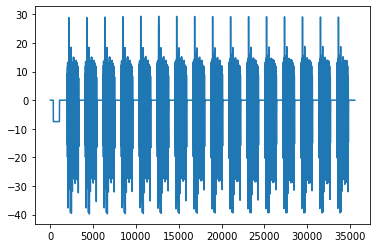

In [20]:
plt.plot(H_py[3])

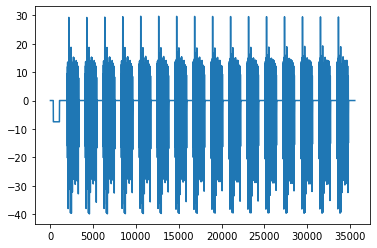

In [21]:
plt.plot(H_o[3])

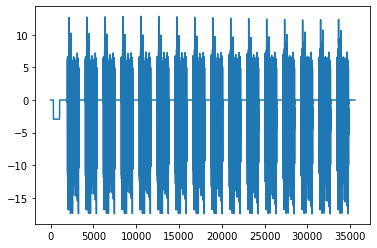

In [22]:
plt.plot(H_py[4])

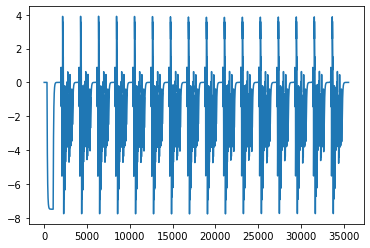

In [23]:
plt.plot(H_o[4])

In [27]:
RCfact = test.model[5]['RCfact']

In [28]:
current = test.model[5]['current']

In [29]:
h = test.model[5]['h']

In [30]:
h

array([-0.        ,  0.        ,  0.        , ..., -0.50637021,
       -0.50637021, -0.50637021])

In [60]:
vrcRaw = np.zeros((2,len(h)))

In [61]:
RCfact

array([0.60820638+0.j, 0.97998973+0.j])

In [64]:
np.diag(RCfact)*vrcRaw

IndexError: index 35557 is out of bounds for axis 0 with size 2

In [77]:
# Simulate the R-C filters to find R-C currents
for i in range(1,len(current)-1):
    vrcRaw[:,i:i+2] = np.diag(RCfact)*vrcRaw[:,i-1] + (1-RCfact)*current[:,i-1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [47]:
1-RCfact

array([0.39179362+0.j, 0.02001027+0.j])

In [48]:
i = 1

In [50]:
vrcRaw[:,i-1:i+1]

array([[0., 0.],
       [0., 0.]])

In [54]:
# Simulate the R-C filters to find R-C currents
for i in range(1,len(current)-1):
    vrcRaw[:,i:i+2] = np.diag(RCfact)*vrcRaw[:,i-1] + (1-RCfact)*current[i-1]

/Users/matthewbohan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


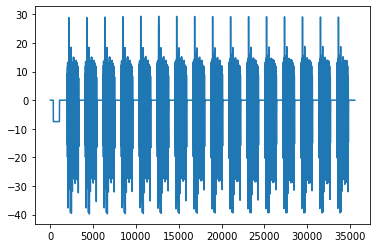

In [58]:
plt.plot(-vrcRaw[0,:])

In [59]:
vrcRaw.shape

(2, 35560)

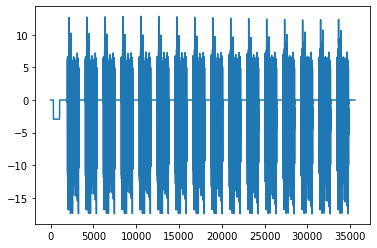

In [56]:
plt.plot(-vrcRaw[1,:])

In [ ]:
plt.plot(-vrcRaw.T)

### Test

In [78]:
from scipy.signal import dlsim

In [113]:
RCfact

array([0.60820638+0.j, 0.97998973+0.j])

In [90]:
np.diag(RCfact)

array([[0.60820638+0.j, 0.        +0.j],
       [0.        +0.j, 0.97998973+0.j]])

In [91]:
1-RCfact

array([0.39179362+0.j, 0.02001027+0.j])

In [116]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [114]:
np.zeros((2,1))

array([[0.],
       [0.]])

In [95]:
current.shape

(35560,)

In [134]:
dlsim((np.diag(RCfact),(1-RCfact),np.eye(2),np.zeros((2,1))),current)

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

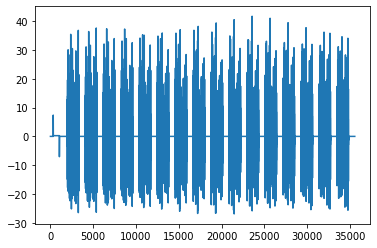

In [108]:
plt.plot(out[1][:,1])

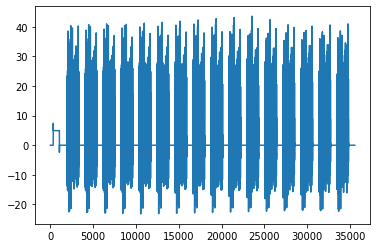

In [110]:
plt.plot(out[1][:,0])

In [79]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [89]:
np.zeros((1,2))

array([[0., 0.]])

In [68]:
test = scipy.io.loadmat(v, simplify_cells=True)

In [70]:
test['etaik']

array([-0., -0., -0., ..., -0., -0., -0.])

In [72]:
test['RCfact']

array([0.59640201, 0.98064987])

In [75]:
import oct2py

In [ ]:
oct2py.

In [ ]:
test.minfn(5,1,5)

In [ ]:
#test.minfn(5,1,96.11)

In [ ]:
#test.minfn(25,0)

In [ ]:
#test.minfn(45,0)

### Definitely something wrong with optfn/minfn because no responding correctly to changes in G
- Next steps: Compare Optfn between python and matlab directly 

In [ ]:
# Processing temperature 5
# G = 96.110
# look here
# M = 0.037733
# M0 = 2.4422e-03
# R0 = 4.6328e-03
# Rfact = 7.6053e-04

print('look here',M,M0,R0,Rfact)

In [ ]:
#test.optfn(96.110,5,1)

In [ ]:
#test.optfn(92,25,1)

In [ ]:
#test.optfn(67,25,1)

In [ ]:
test.compute_dynamic_params(1)

In [ ]:
plt.plot(test.model[25]['vest1'])

In [ ]:
#test.model[45]

In [ ]:
# options=optimset('TolX',1e-8,'TolFun',1e-8,'MaxFunEval',100000, ...
# 'MaxIter',1e6,'Jacobian','Off'); % for later optimization
# options=optimset('TolX',0.1,'TolFun',1e-2,'MaxFunEval',40, ...
# 'MaxIter',20,'Jacobian','Off'); % for later optimization

In [ ]:
blah = [1,2,3,4]

In [ ]:
blah[-2:]

In [ ]:
RCfact = np.array([0.074999,0.596402,0.980650])

In [ ]:
RCfact = RCfact[-2:]

In [ ]:
current = test.model[25]['current']

In [ ]:
vrcRaw = test.model[25]['vrcRaw']

In [ ]:
vrcRaw.shape

In [ ]:
np.diag(RCfact)

In [ ]:
for i in range(1,len(current)-1):
    vrcRaw[:,i:i+2] = np.diag(RCfact)*vrcRaw[:,i-1] + (1-RCfact)*current[i-1]

In [ ]:
i

In [ ]:
vrcRaw[:,i-1]

In [ ]:
a = np.diag(RCfact)*vrcRaw[:,i-1]

In [ ]:
a

In [ ]:
a.shape

In [ ]:
b = (1-RCfact)*current[i-1]

In [ ]:
b

In [ ]:
b.shape

In [ ]:
c = a + b

In [ ]:
c

In [ ]:
c.shape

In [ ]:
vrcRaw[:,i:i+2]

In [ ]:
x = np.arange(10)

In [ ]:
x

In [ ]:
x.shape = (2,5)

In [ ]:
x

In [ ]:
x[1]

In [ ]:
x[:,0]

In [ ]:
total_range = list(range(1,len(current)))

In [ ]:
i = total_range[0]

In [ ]:
i = 3

In [ ]:
vrcRaw[:,i:i+2]

In [137]:
vrc_raw_oct = scipy.io.loadmat('../data/vrc_raw.mat', simplify_cells=True)

In [162]:
h = vrc_raw_oct['h']
etaik = vrc_raw_oct['etaik']
ik = vrc_raw_oct['ik']
RCfact = vrc_raw_oct['RCfact']
num_poles = 2

In [149]:
vrcRaw = np.zeros((num_poles,len(h)))

In [164]:
#+ (1-RCfact)*etaik[k-1]

In [185]:
vrcRaw.T[:,k:k+1]

array([[0.],
       [0.]])

In [184]:
vrcRaw[:,k]

IndexError: index 2 is out of bounds for axis 1 with size 2

In [191]:
vrcRaw

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [192]:
test = [[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[17,18],[19,20]]

In [ ]:
test = [1 2; 3 4; 5 6; 7 8; 9 10; 11 12; 13 14; 15 16; 17 18; 19 20]

In [193]:
test

[[1, 2],
 [3, 4],
 [5, 6],
 [7, 8],
 [9, 10],
 [11, 12],
 [13, 14],
 [15, 16],
 [17, 18],
 [19, 20]]

In [194]:
len(test)

10

In [197]:
np.diag(RCfact)

array([[0.59640201, 0.        ],
       [0.        , 0.98064987]])

In [204]:
for k in range(len(test)):
    print(k)
    print(test[k])
    #print(test)

0
[1, 2]
1
[3, 4]
2
[5, 6]
3
[7, 8]
4
[9, 10]
5
[11, 12]
6
[13, 14]
7
[15, 16]
8
[17, 18]
9
[19, 20]


In [188]:
for k in range(2,len(ik)):
    #vrcRaw[:,k:k+2] = np.diag(RCfact)*vrcRaw[:,k]

IndexError: index 2 is out of bounds for axis 1 with size 2

In [186]:
for k in range(2,len(ik)):
    vrcRaw.T[:,k:k+2] = np.diag(RCfact)*vrcRaw[:,k:k+1] 

ValueError: operands could not be broadcast together with shapes (2,2) (35560,0) 

In [158]:
vrcRaw.shape

(2, 35560)

In [159]:
vrcRaw = vrcRaw.T

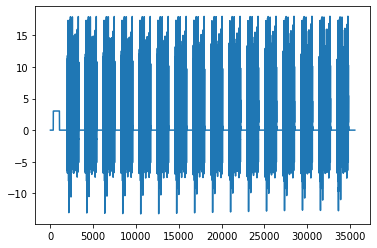

In [160]:
plt.plot(vrcRaw[:,1])

In [146]:
result = vrc_raw_oct['vrcRaw']

In [ ]:
result

In [156]:
result.shape

(35560, 2)

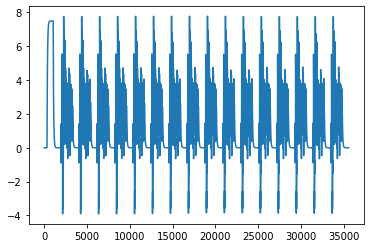

In [161]:
plt.plot(result[:,1])

In [140]:
len(ik)

35560

In [141]:
len(etaik)

35560

In [136]:
vrc_raw_oct.shape

(35560, 2)

In [ ]:
vrc_raw_oct[-2000]

In [ ]:
vrc_raw_py.T[-2000]

In [ ]:
vrc_raw_oct.sum()

In [ ]:
vrc_raw_oct[:,1].sum()

In [ ]:
vrc_raw_oct[:,0].sum()

In [ ]:
vrc_raw_py = test.model[5]['vrcraw']

In [ ]:
vrc_raw_py.shape

In [ ]:
vrc_raw_py.T.shape

In [ ]:
vrc_raw_py.sum()

In [ ]:
vrc_raw_py[1,:].sum()

In [ ]:
vrc_raw_py[0,:].sum()

### Check hyst and non_hyst calcs

In [ ]:
h = test.model[25]['h'] 
s = test.model[25]['s'] 
current = test.model[25]['current'] 
vrcRaw = test.model[25]['vrcraw']
verr = test.model[25]['verr1']

In [ ]:
H = np.vstack((h,s,-current,-vrcRaw[0]))

In [ ]:
H

In [ ]:
W = nnls(H.T,verr)[0]

In [ ]:
W